<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW/Ch4_%EC%8B%A4%EC%8A%B5_Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter4-4. CNN : CNN 발전 시키기

>## 실습 : Fashion-MNIST Classification (CNN)

>### Load modules

In [1]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.17.4
TensorFlow Version :1.15.0
Matplotlib Version :3.1.2


> ### Load MNIST Data

In [2]:
# Data Load : x_input, labels와 같이 학습/테스트에 필요한 데이터셋 및 정답 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

train_data = train_data.astype(np.float32)
train_data = np.expand_dims(train_data, axis = -1)
train_data = train_data / 255.0

test_data = test_data.astype(np.float32)
test_data = np.expand_dims(test_data, axis = -1)
test_data = test_data / 255.0

train_labels = train_labels.reshape((-1, 1))
test_labels = test_labels.reshape((-1, 1))


# test_data와 train_data의 분포를 보기 위함!
train_fashion_cnt = np.zeros((10,), dtype=np.int32)
for i in range(60000):
  for j in range(10):
    if train_labels[i] == j:
      train_fashion_cnt[j] += 1
print(train_fashion_cnt)

test_fashion_cnt = np.zeros((10,), dtype=np.int32)
for i in range(10000):
  for j in range(10):
    if test_labels[i] == j:
      test_fashion_cnt[j] += 1
print(test_fashion_cnt)


# Categories
categories = 10

#            ▼

# 숫자가 아닌 문자열로 프린트 하고 싶어서!
fashion_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]




> ## Hyper parameter



In [3]:
learning_rate = 0.001
training_do_rate = 0.5

N_epoch = 100
batch_size = 1000
train_data_size = train_data.shape[0]
print("train_data_size =", train_data_size)

batch_count = train_data_size//batch_size
print("batch_count =", batch_count)

train_data_size = 60000
batch_count = 60




> ## PlaceHolder



In [0]:
x_ph = tf.placeholder(tf.float32, shape=(None, 28, 28, 1), name="input")
labels_ph = tf.placeholder(tf.int32, shape=(None, 1), name="labels")
dropout_rate_ph = tf.placeholder(tf.float32, shape=(), name="Dropout_rate")



> ## Define Network as function : in this function, "Dropout"



In [0]:
def network(input_data, rate):

  convolution1 = tf.layers.conv2d(input_data, filters=128, kernel_size=3, padding='SAME', activation=tf.nn.relu) # instead of sigmoid, use "ReLU"
  dropout1 = tf.layers.dropout(convolution1, rate=rate)  # instead of batch normalization, use "Dropout"
  pooling1 = tf.layers.max_pooling2d(dropout1, pool_size=[2, 2], strides=[2, 2])

  convolution2 = tf.layers.conv2d(pooling1, filters=256, kernel_size=3, padding='SAME', activation=tf.nn.relu)
  dropout2 = tf.layers.dropout(convolution2, rate=rate)
  pooling2 = tf.layers.max_pooling2d(dropout2, pool_size=[2, 2], strides=[2, 2])

  convolution3 = tf.layers.conv2d(pooling2, filters=384, kernel_size=3, padding='SAME', activation=tf.nn.relu)
  dropout3 = tf.layers.dropout(convolution3, rate=rate)
  pooling3 = tf.layers.max_pooling2d(dropout3, pool_size=[2, 2], strides=[2, 2])

  convolution4 = tf.layers.conv2d(pooling3, filters=64, kernel_size=3, padding='SAME', activation=tf.nn.relu)
  dropout4 = tf.layers.dropout(convolution4, rate=rate)
  pooling4 = tf.layers.max_pooling2d(dropout4, pool_size=[3, 3], strides=[2, 2])

  flatten = tf.layers.flatten(pooling4)
  pre_logits = tf.layers.dense(flatten, 256, activation=tf.nn.relu)
  dropout4 = tf.layers.dropout(pre_logits, rate=rate)
 # real_logits = tf.layers.dense(dropout4, 128)
 # dropout5 = tf.layers.dropout(real_logits, rate=rate)
  realreal_logits = tf.layers.dense(dropout4, 10)
  hypothesis = tf.nn.softmax(realreal_logits)

  return pooling1, pooling2, pooling3, pre_logits, realreal_logits, hypothesis



> ## Hypothesis by network function // Cost, Optimizer



In [6]:
pooling1, pooling2, pooling3, pre_logits, real_logits, hypothesis = network(x_ph, dropout_rate_ph)
labels_oh = tf.one_hot(labels_ph, categories)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels_oh, real_logits))

optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(cost)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.




> ## Accuracy, Plotting



In [0]:
def Accuracy(y:np.ndarray, t:np.ndarray)->np.float32:
    return np.mean(np.equal(np.argmax(y, axis=1).reshape((-1, 1)),t).astype(np.float32))


def Make_Result_Plot(suptitle:str, data:np.ndarray, label:np.ndarray, y_max:np.ndarray):
    fig_result, ax_result = plt.subplots(3,3,figsize=(20,8))
    fig_result.suptitle(suptitle)
    for idx in range(9):
        ax_result[idx//3][idx%3].imshow(data[idx].reshape(28, 28),cmap="binary")
        ax_result[idx//3][idx%3].set_title("test_data[{}] (label : {} / y : {})".format(idx, fashion_name[label[idx][0]], fashion_name[y_max[idx][0]]))
        ax_result[idx//3][idx%3].set_yticklabels([])
        ax_result[idx//3][idx%3].set_xticklabels([])

def Make_False_Result_Plot(suptitle:str, data:np.ndarray, label:np.ndarray, y_max:np.ndarray):
    false_arr = []
    for idx in range(len(label)):
      if label[idx] != y_max[idx]:
        false_arr.append(idx)
    np.random.shuffle(false_arr)

    fig_result, ax_result = plt.subplots(3, 3,figsize=(20,8))
    fig_result.suptitle(suptitle)

    for idx in range(len(false_arr)):
      if idx >= 9: break
      ax_result[idx//3][idx%3].imshow(data[false_arr[idx]].reshape(28, 28),cmap="binary")
      ax_result[idx//3][idx%3].set_title("false_arr[{}] (label : {} / y : {})".format(false_arr[idx], fashion_name[label[false_arr[idx]][0]], fashion_name[y_max[false_arr[idx]][0]]))
      ax_result[idx//3][idx%3].set_yticklabels([])
      ax_result[idx//3][idx%3].set_xticklabels([])   
    print(len(false_arr))




> ## Training Preparation



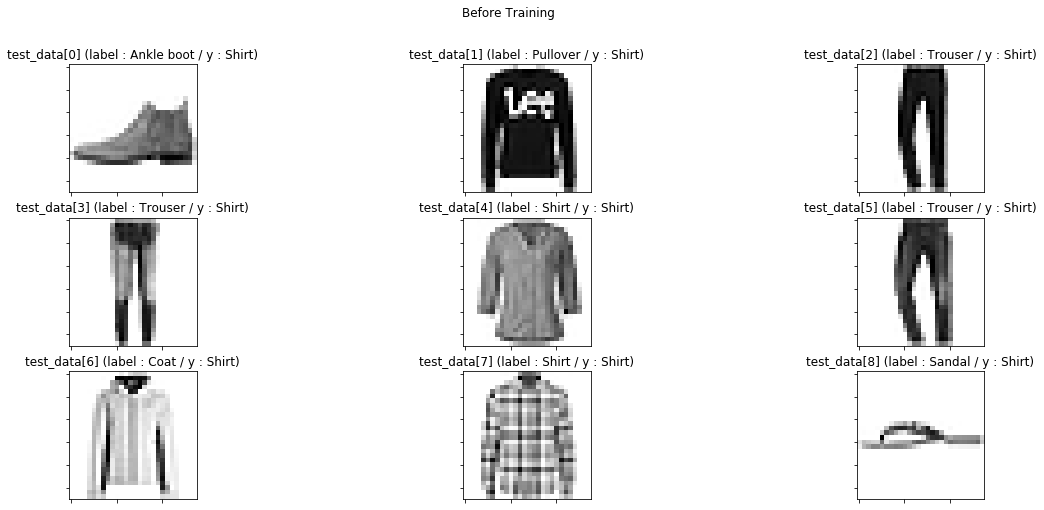

In [8]:
arr_epoch = []
arr_accu = []

# 학습 (Training)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

train_data_idx = np.arange(train_data_size)

y_out = sess.run(hypothesis, feed_dict={x_ph: test_data, dropout_rate_ph: 0.0})
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("Before Training", test_data, test_labels, y_max)

accu = Accuracy(y_out,test_labels)
arr_epoch.append(0)
arr_accu.append(accu)



> ## Training



In [9]:
%%time
for epoch_idx in range(1, N_epoch+1):
    np.random.shuffle(train_data_idx)
    for batch_idx in range(batch_count):
        batch_data = np.array([train_data[train_data_idx[batch_idx*batch_size+idx]] for idx in range(batch_size)])
        batch_labels = np.array([train_labels[train_data_idx[batch_idx*batch_size+idx]] for idx in range(batch_size)])
        sess.run(train, feed_dict={x_ph: batch_data, labels_ph: batch_labels,dropout_rate_ph: training_do_rate})
    if epoch_idx%1 == 0:
        y_out = sess.run(hypothesis, feed_dict={x_ph: test_data, dropout_rate_ph: 0.0})
        accu = Accuracy(y_out,test_labels)
        print("[{:>5}] accuracy = {:>10.4}".format(epoch_idx,accu))
        arr_epoch.append(epoch_idx)
        arr_accu.append(accu)

[    1] accuracy =     0.7947
[    2] accuracy =     0.8381
[    3] accuracy =     0.8586
[    4] accuracy =     0.8821
[    5] accuracy =     0.8911
[    6] accuracy =     0.8902
[    7] accuracy =     0.8954
[    8] accuracy =      0.893
[    9] accuracy =     0.9066
[   10] accuracy =     0.9074
[   11] accuracy =     0.9143
[   12] accuracy =     0.9106
[   13] accuracy =     0.9145
[   14] accuracy =      0.918
[   15] accuracy =     0.9148
[   16] accuracy =     0.9165
[   17] accuracy =     0.9194
[   18] accuracy =     0.9212
[   19] accuracy =     0.9205
[   20] accuracy =     0.9212
[   21] accuracy =     0.9215
[   22] accuracy =     0.9212
[   23] accuracy =     0.9136
[   24] accuracy =     0.9255
[   25] accuracy =       0.92
[   26] accuracy =     0.9207
[   27] accuracy =     0.9202
[   28] accuracy =     0.9229
[   29] accuracy =     0.9259
[   30] accuracy =      0.918
[   31] accuracy =     0.9287
[   32] accuracy =     0.9207
[   33] accuracy =     0.9253
[   34] ac



> ## After Training




701


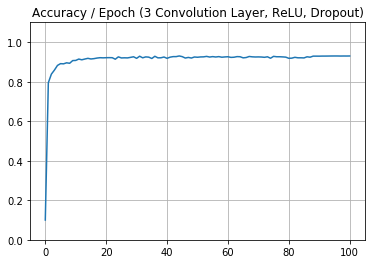

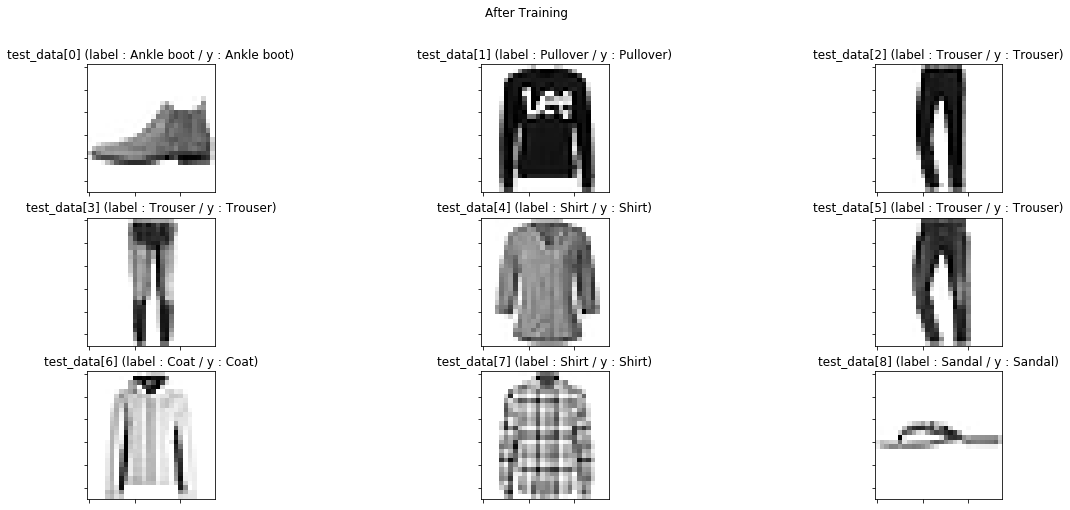

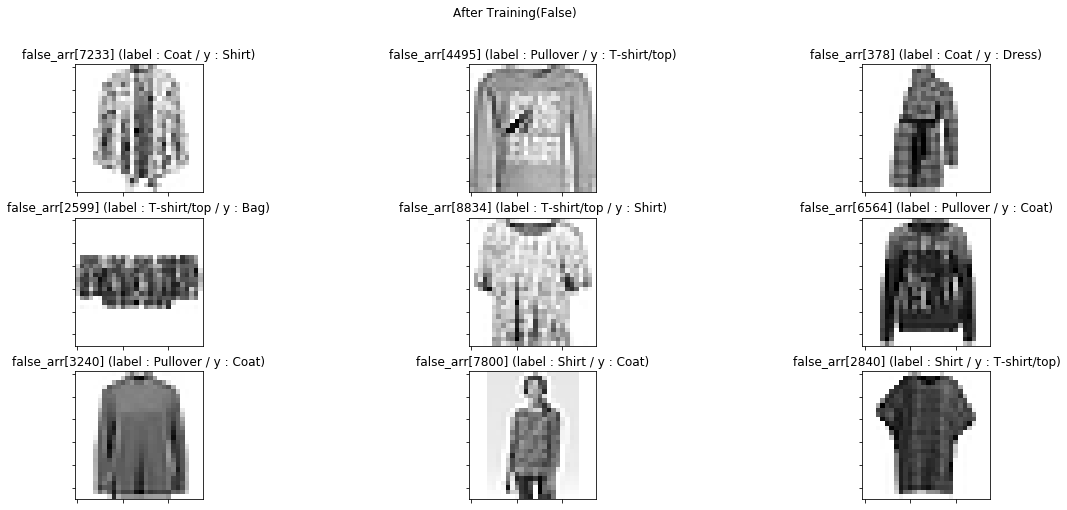

In [10]:
# Plot : Accuracy / Epoch
fig_cost, ax_cost = plt.subplots()
ax_cost.plot(arr_epoch, arr_accu)
ax_cost.set_title("Accuracy / Epoch (3 Convolution Layer, ReLU, Dropout)")
ax_cost.grid(True)
ax_cost.set_ylim(0,1.1)

y_out = sess.run(hypothesis, feed_dict={x_ph: test_data})
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)
Make_False_Result_Plot("After Training(False)", test_data, test_labels, y_max)

plt.show()

>## Example : Check Training Data

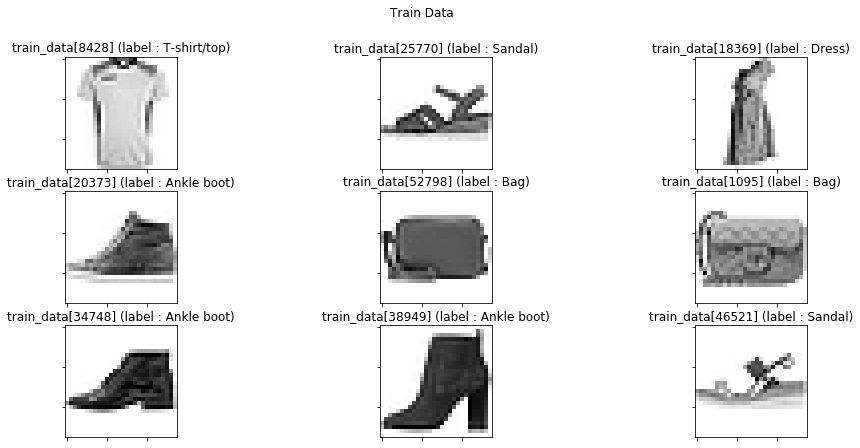

In [11]:
train_data = np.squeeze(train_data)

idx_show = np.arange(0, train_data.shape[0])
np.random.shuffle(idx_show)
idx_show = idx_show[0:9]
fig_train, ax_train = plt.subplots(3,3,figsize=(16, 7))
fig_train.suptitle("Train Data")
for idx in range(9):
    ax_train[idx//3][idx%3].imshow(train_data[idx_show[idx]],cmap="binary")
    ax_train[idx//3][idx%3].set_title("train_data[{}] (label : {})".format(idx_show[idx], fashion_name[train_labels[idx_show[idx]][0]]))
    ax_train[idx//3][idx%3].set_yticklabels([])
    ax_train[idx//3][idx%3].set_xticklabels([])

> ### 1차 Convolution Layer의 결과물 : 저차원 feature map

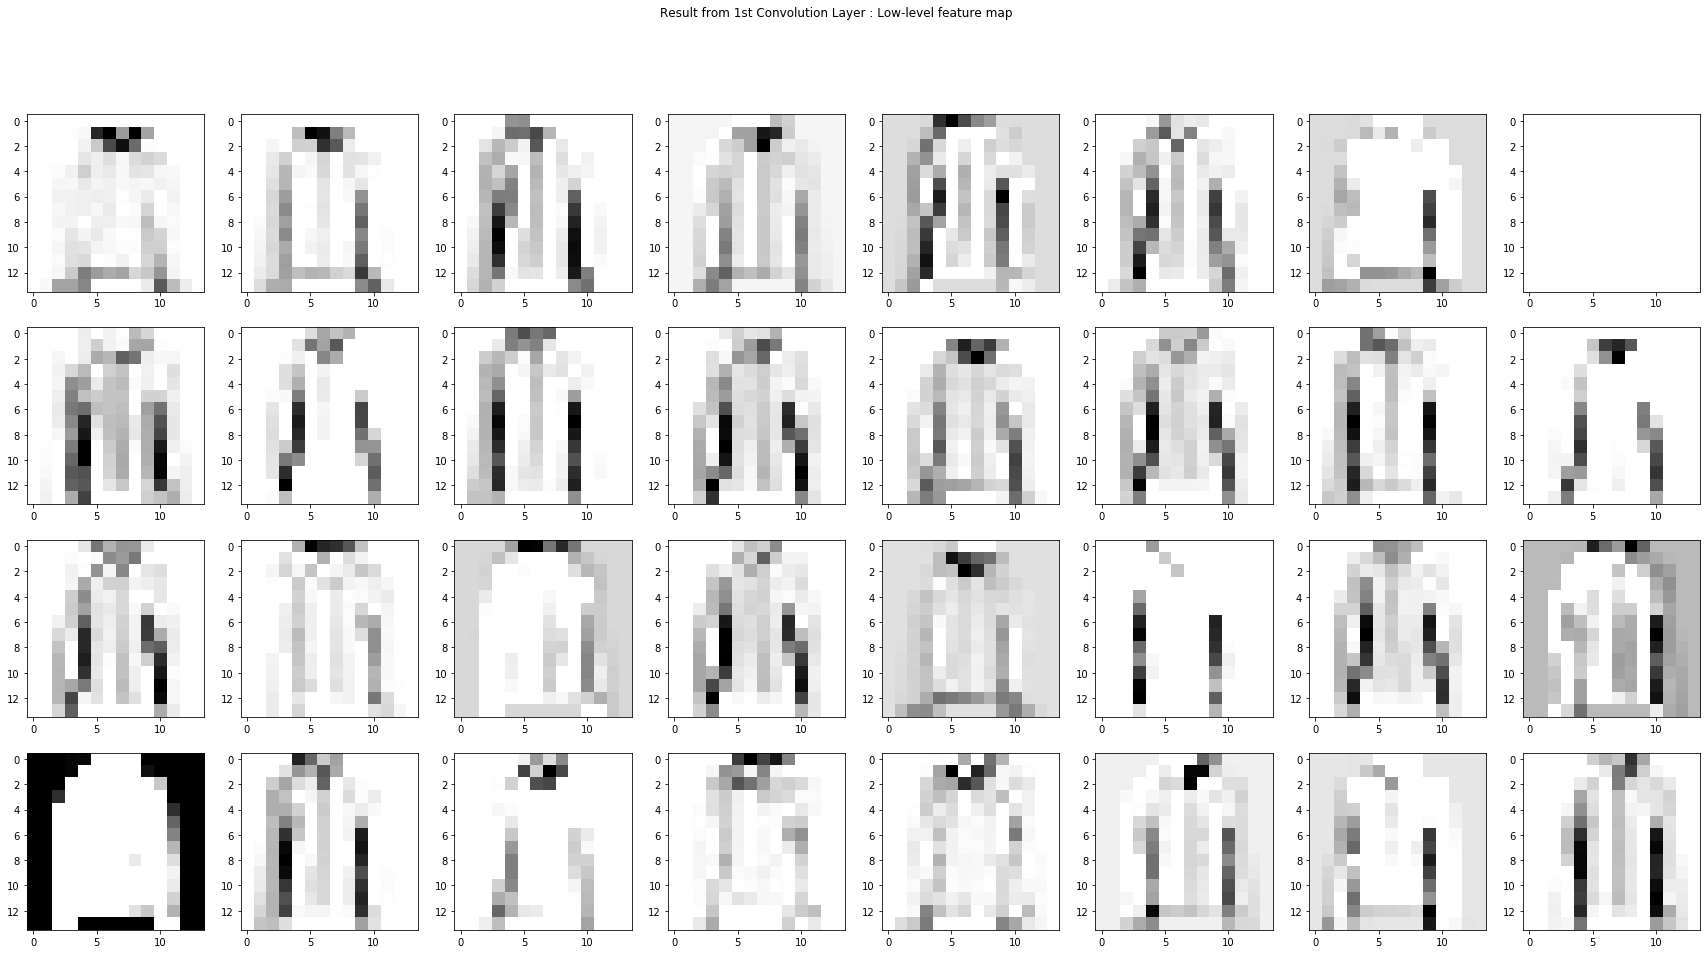

In [12]:
sample_test_data = [test_data[6]]
ret_pool1,ret_pool2,ret_pool3 = sess.run((pooling1,pooling2,pooling3), feed_dict={x_ph: sample_test_data,dropout_rate_ph: 0.0}) 

fig_feature1, ax_feature1 = plt.subplots(4,8,figsize=(30,15))
fig_feature1.suptitle("Result from 1st Convolution Layer : Low-level feature map")
ret_pool1 = np.transpose(ret_pool1,axes=(0,3,1,2))
for idx in range(32):
  ax_feature1[idx//8][idx%8].imshow(ret_pool1[0][idx],cmap="binary")

> ### 2차 Convolution Layer의 결과물

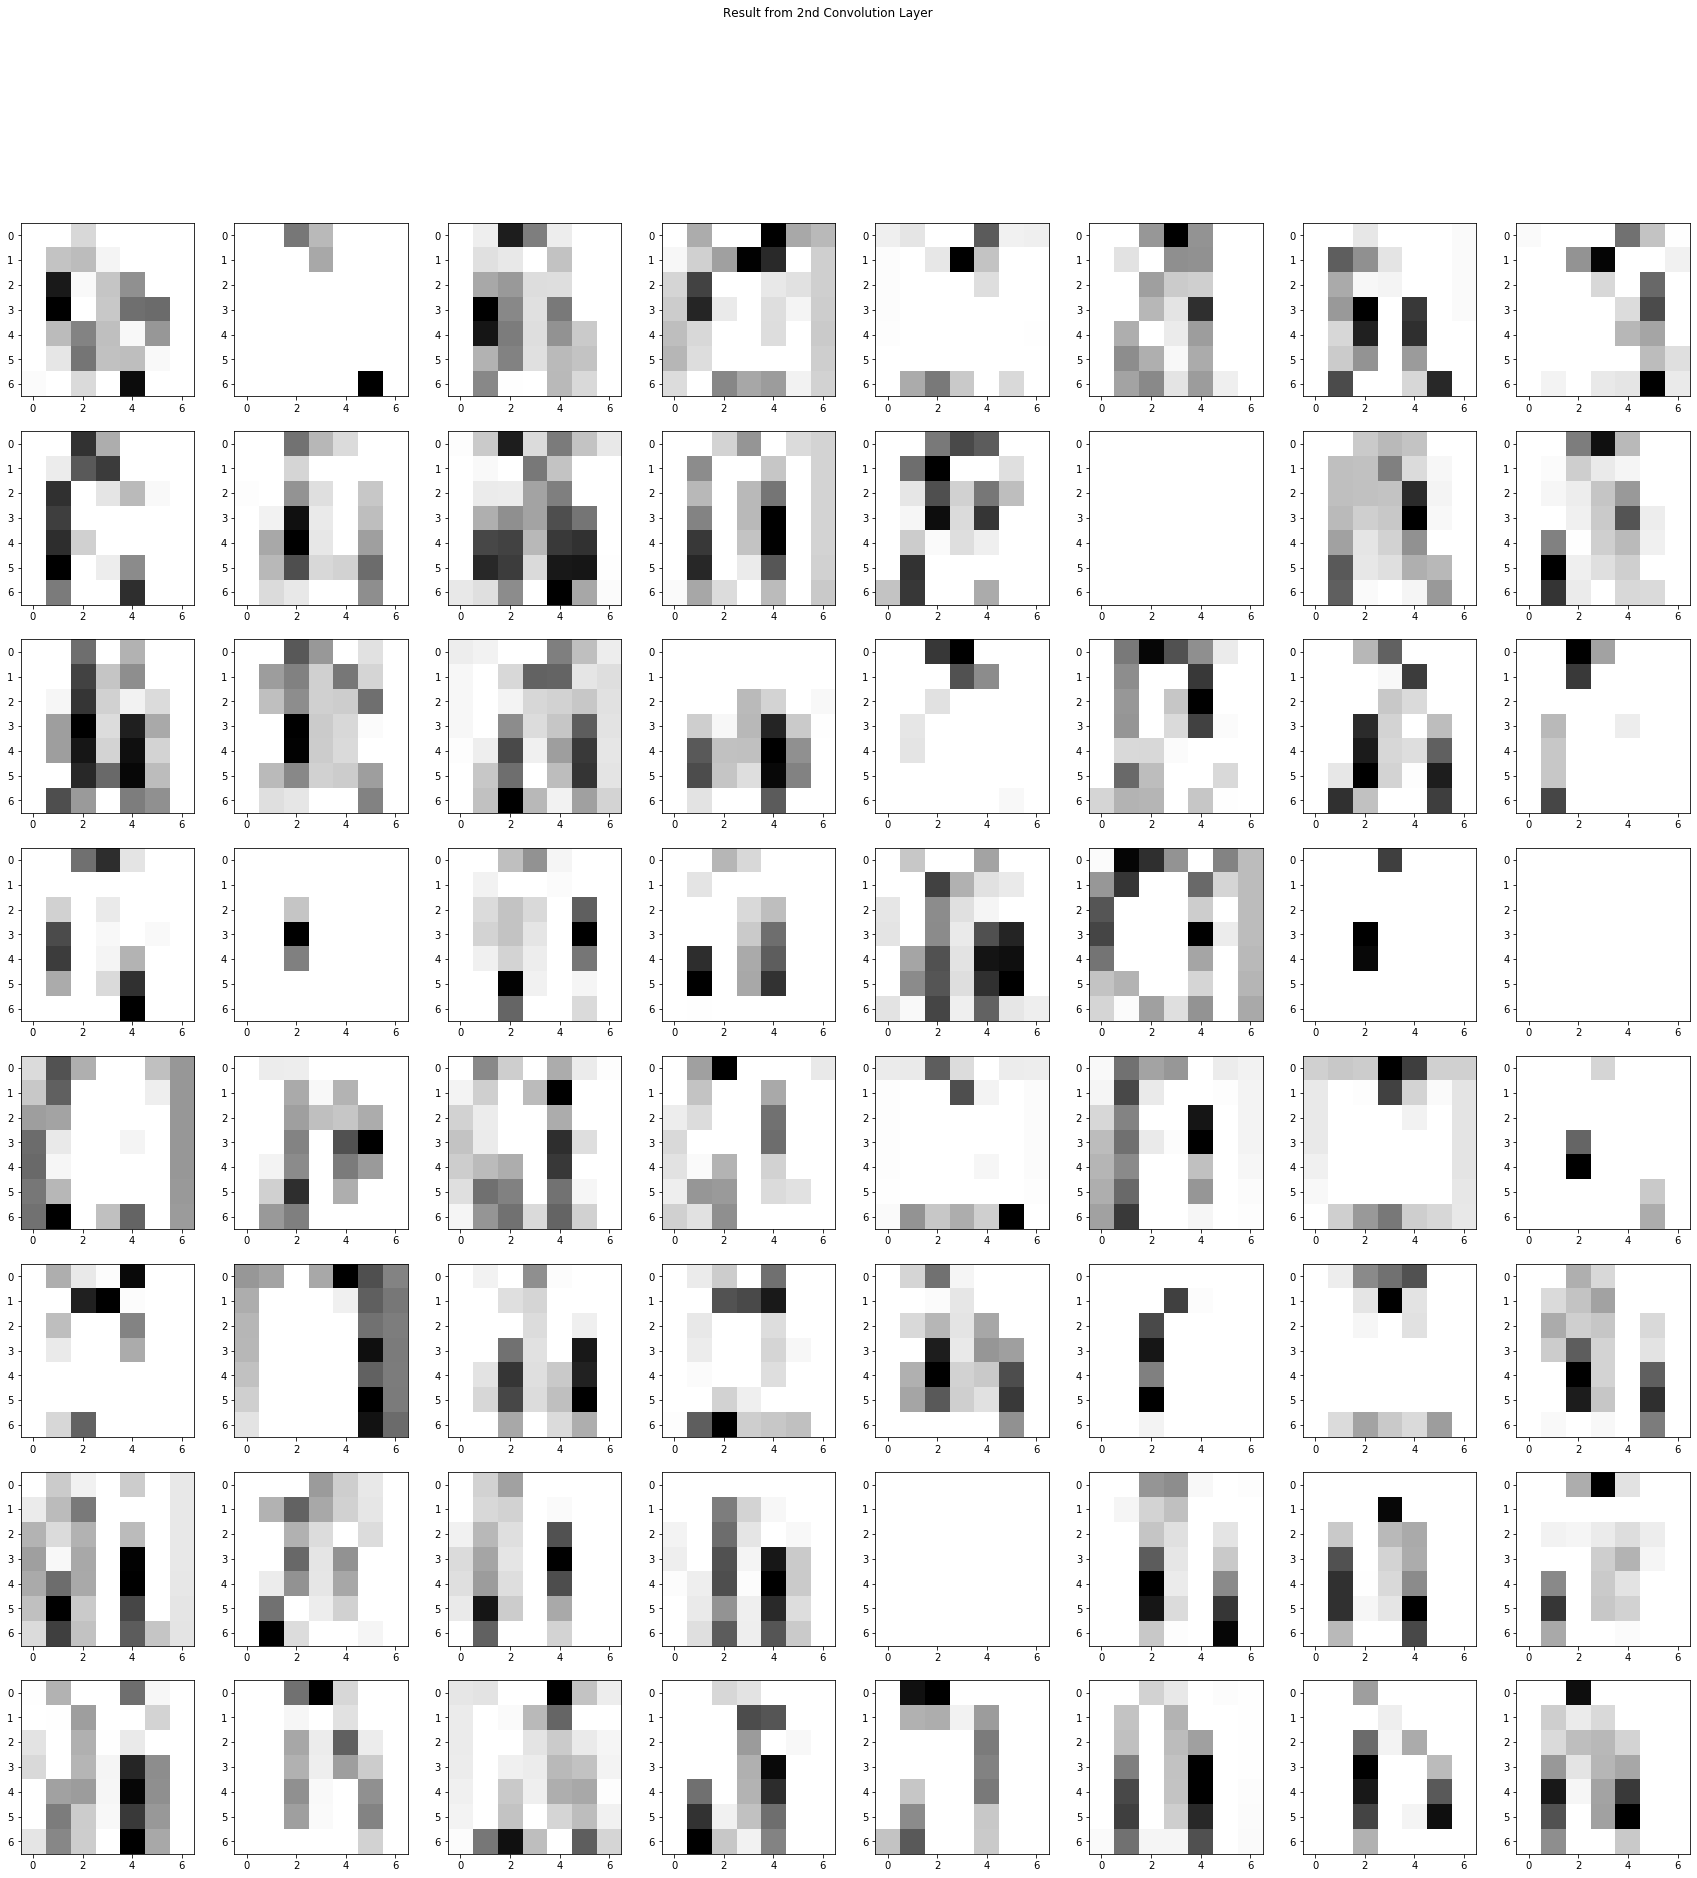

In [13]:
fig_feature2, ax_feature2 = plt.subplots(8,8,figsize=(30,30))
fig_feature2.suptitle("Result from 2nd Convolution Layer")
ret_pool2 = np.transpose(ret_pool2,axes=(0,3,1,2))
for idx in range(64):
  ax_feature2[idx//8][idx%8].imshow(ret_pool2[0][idx],cmap="binary")

> ### 3차 Convolution Layer의 결과물 : 고차원 feature

TypeError: ignored

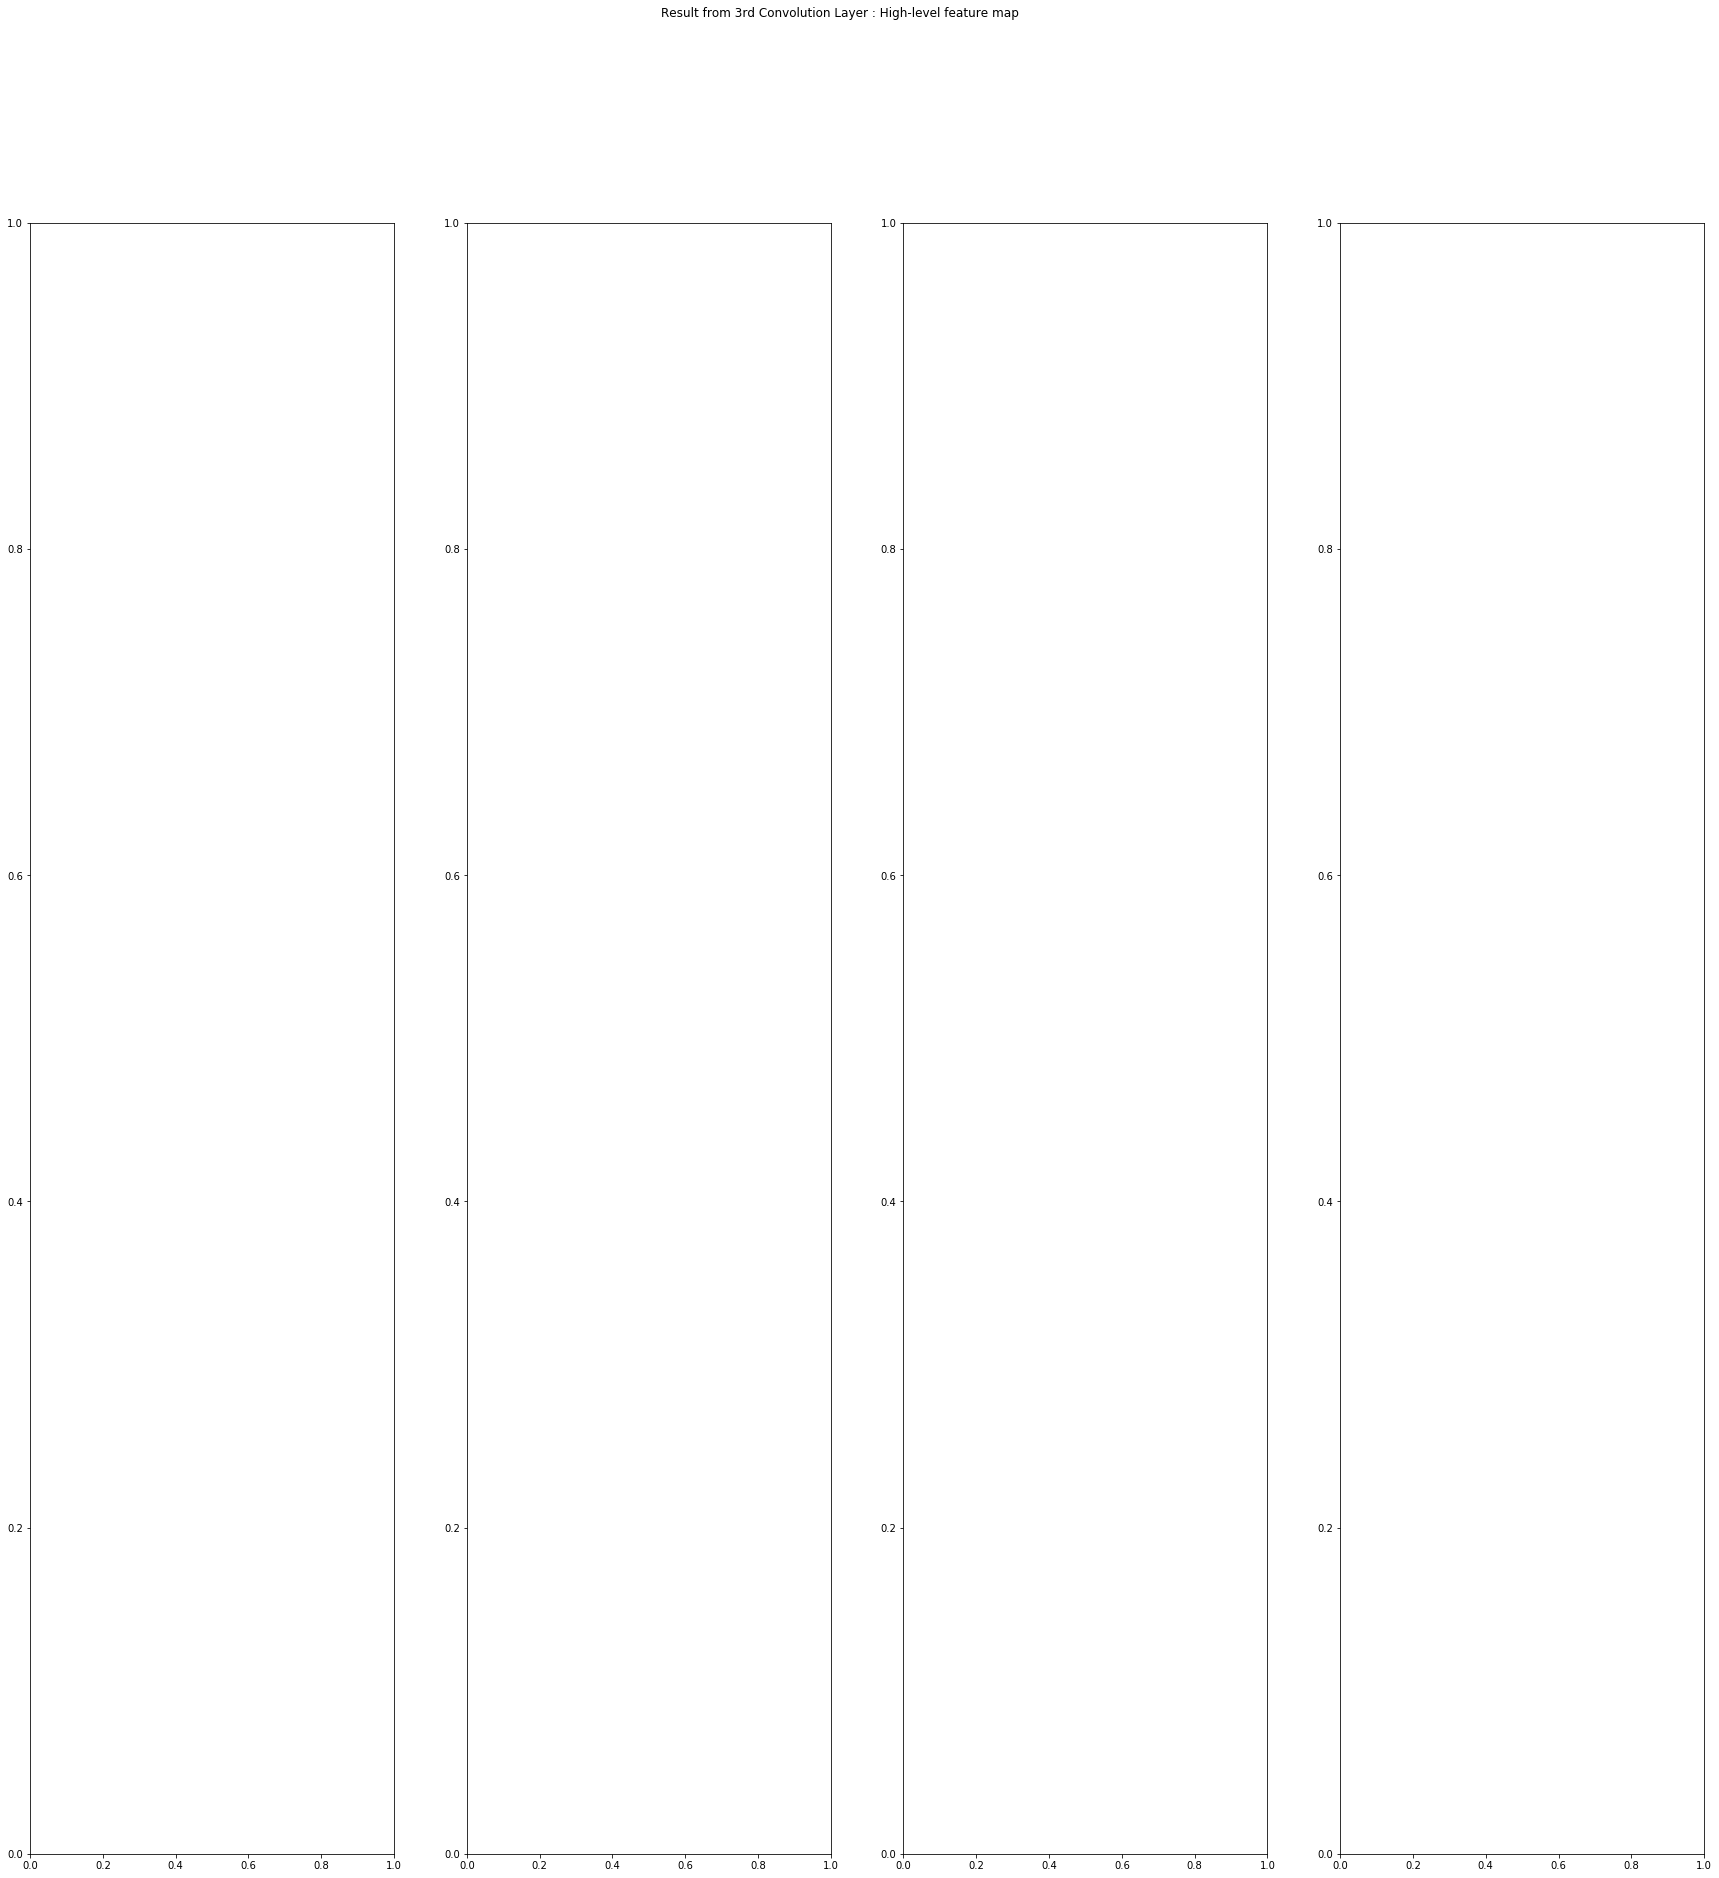

In [14]:
fig_feature3, ax_feature3 = plt.subplots(1,4,figsize=(30,30))
fig_feature3.suptitle("Result from 3rd Convolution Layer : High-level feature map")
ret_pool3 = np.transpose(ret_pool3,axes=(0,3,1,2))
for idx in range(4):
  ax_feature3[0][idx%4].imshow(ret_pool3[0][idx],cmap="binary")